In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [2]:
url = "/Users/arturcabral/Documents/Ironhack/Labs/Week_4/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(url)

In [3]:
df2 = pd.crosstab(df["category"], df["isBestSeller"])

In [4]:
df2

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 3D Printers to eBook Readers & Accessories
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   False   296 non-null    int64
 1   True    296 non-null    int64
dtypes: int64(2)
memory usage: 6.9+ KB


In [6]:
df3 = df2.sort_values(by=True, ascending=False)
df_top = df3[:5] # Top 5
df_top

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [7]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df3)
chi2_statistic, chi2_p_value


(36540.202700613874, 0.0)

In [8]:
association(df3, method="cramer")

0.12228294397605641

In [9]:
df_top = df_top.reset_index()

In [10]:
df_top

isBestSeller,category,False,True
0,Grocery,9008,556
1,Health & Personal Care,9017,552
2,Baby,14709,341
3,Sports & Outdoors,835935,330
4,Power & Hand Tools,8353,306


/var/folders/nt/dslv10js033g889ybfhq1dmw0000gn/T/ipykernel_2595/1896634327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_top["category"], x=df_top[True].values, palette="pastel", width=0.5)


<Axes: ylabel='category'>

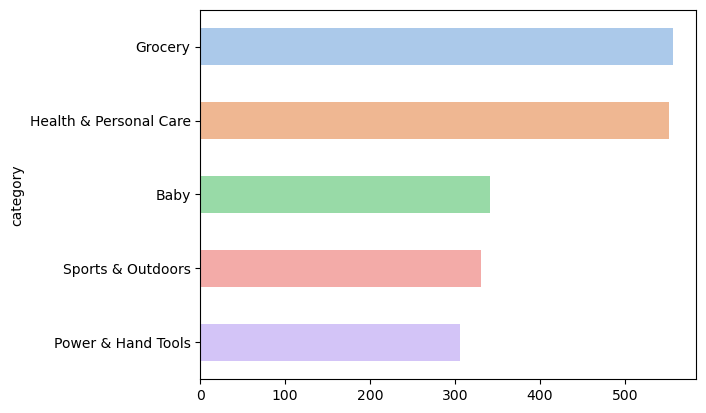

In [11]:
sns.barplot(y=df_top["category"], x=df_top[True].values, palette="pastel", width=0.5)

Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

1 Crosstab Analysis:
    Create a crosstab between the product category and the isBestSeller status.

    Are there categories where being a best-seller is more prevalent?

    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

2 Statistical Tests:
    Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    Compute Cramér's V to understand the strength of association between best-seller status and category.
3 Visualizations:
    Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [12]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [13]:
df["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [14]:
df_clean = pd.DataFrame(tukeys_test_outliers(df["price"]))
df_clean = df.drop(index=df_clean.index)
df_clean.sort_values(by="price", inplace=True)

In [15]:
df_clean

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
547507,590332,B09WRXGQZL,"Faith, Hope and Carnage",4.7,546,0.00,False,0,PC & Video Games
1422882,1565480,B0055SY77Y,Einstein's Tennis Racket (Einstein-Uber years),5.0,1,0.00,False,0,Sports & Outdoors
1184254,1308885,B0CJS3HXG6,"Jesu, joy of man's desiring",3.2,6,0.00,False,0,Piano & Keyboard
836136,911439,B0BLFPRMZH,"Dungeons & Guardians: Battleborne, Book III",4.7,2421,0.00,False,0,Games & Game Accessories
1696245,1910119,B07VHSVDTY,How Not to Diet: The Groundbreaking Science of...,4.7,6187,0.00,False,0,Sports Supplements
...,...,...,...,...,...,...,...,...,...
2133173,2474089,B07MZ9LLCC,Google Pixel 3 64GB - Just Black - Unlocked (R...,4.1,41,99.99,False,0,Mobile Phones & Smartphones
2133182,2474098,B09NLK3QKF,"UMIDIGI Bison X10S Rugged Phone,6150mAh Batter...",3.7,337,99.99,False,0,Mobile Phones & Smartphones
2133281,2474202,B071F9HN3X,Nokia 5 UK-SIM Free Smartphone - Copper,4.2,423,99.99,False,0,Mobile Phones & Smartphones
2133094,2474010,B012C47W4S,Samsung Galaxy J5 Smartphone,4.2,449,99.99,False,0,Mobile Phones & Smartphones


In [16]:
df_clean_top_sales = df_clean["category"].value_counts().nlargest(20).index.to_list()
df_clean_top_sales

['Sports & Outdoors',
 'Beauty',
 'Bath & Body',
 'Manicure & Pedicure Products',
 'Handmade Clothing, Shoes & Accessories',
 'Make-up',
 'Skin Care',
 'Hair Care',
 'Birthday Gifts',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Luggage and travel gear',
 'Women',
 'Fragrances',
 'Handmade Kitchen & Dining',
 'Handmade Artwork',
 'Handmade Home & Kitchen Products',
 'Handmade Jewellery',
 'Men',
 'Baby']

In [17]:
df_final = df_clean[df_clean["category"].isin(df_clean_top_sales)]

In [18]:
df_final

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1422882,1565480,B0055SY77Y,Einstein's Tennis Racket (Einstein-Uber years),5.0,1,0.00,False,0,Sports & Outdoors
342871,367018,B07TYXW54L,Exercises with Resistance Loop Bands: 40+ Exer...,4.1,94,0.00,False,0,Sports & Outdoors
1531995,1726672,B07YGP8442,100 Years of Leeds United,4.8,1349,0.00,False,0,Sports & Outdoors
1025782,1134431,B0BL8LQCHZ,"4 in 1 Bundle Off the Grid Survival Book, Prep...",4.3,5,0.00,False,0,Sports & Outdoors
1532255,1727033,B082H1M3WM,Folklore and Fables II: An alternative look at...,4.7,14,0.00,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
91232,99330,B0B6RM5S41,Beeline Bike GPS Computer - Velo 2 | Wireless ...,4.1,207,99.99,False,0,Sports & Outdoors
91349,99447,B09RZL31L2,CANMORE HG200 Handheld Golf GPS & Case - Essen...,3.2,235,99.99,False,0,Sports & Outdoors
91524,99623,B09G62MCLL,TecTecTec ULT-G Ultra-Light Golf GPS Handheld ...,3.9,66,99.99,False,0,Sports & Outdoors
91557,99656,B0BNNFXH8F,TecTecTec TEAM8 S Golf GPS Bluetooth Speaker -...,4.4,70,99.99,False,0,Sports & Outdoors


/var/folders/nt/dslv10js033g889ybfhq1dmw0000gn/T/ipykernel_2595/135511709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_final, x="category", y='price', palette="pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Make-up'),
  Text(2, 0, 'Fragrances'),
  Text(3, 0, 'Manicure & Pedicure Products'),
  Text(4, 0, 'Beauty'),
  Text(5, 0, 'Hair Care'),
  Text(6, 0, 'Handmade Home Décor'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Baby'),
  Text(9, 0, 'Handmade Jewellery'),
  Text(10, 0, 'Luggage and travel gear'),
  Text(11, 0, 'Skin Care'),
  Text(12, 0, 'Handmade Home & Kitchen Products'),
  Text(13, 0, 'Handmade Kitchen & Dining'),
  Text(14, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(15, 0, 'Handmade Artwork'),
  Text(16, 0, 'Men'),
  Text(17, 0, 'Women'),
  Text(18, 0, 'Birthday Gifts'),
  Text(19, 0, 'Handmade Gifts')])

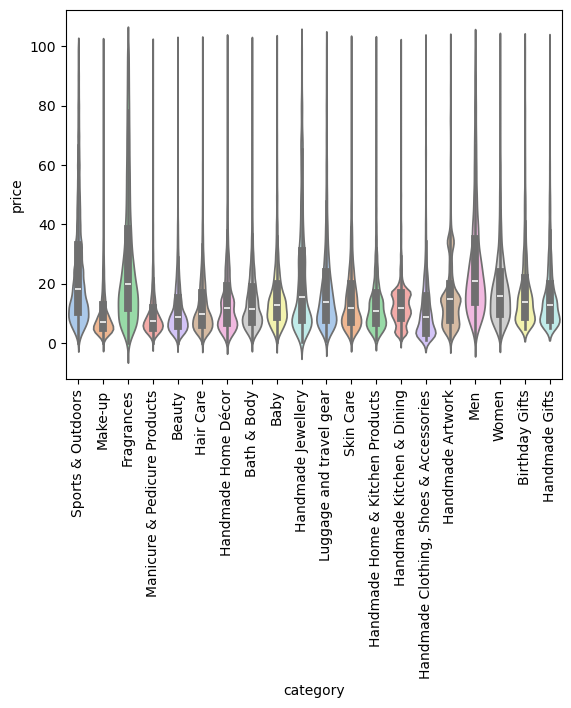

In [19]:
sns.violinplot(df_final, x="category", y='price', palette="pastel")
plt.xticks(rotation=90)

In [20]:
df_clean.groupby("category").agg({"price":"median"}).sort_values(by="price", ascending=False).head(1)

,price
category,
Desktop PCs,74.0


In [21]:
df_clean_top10_sales = df_clean["category"].value_counts().nlargest(10).index.to_list()
df_clean_final10 = df_clean[df_clean["category"].isin(df_clean_top10_sales)]

In [22]:
df_final10 = df_clean_final10.groupby("category").agg({"price":"mean"}).reset_index().round(2)

In [23]:
df_final10

,category,price
0,Bath & Body,14.68
1,Beauty,12.52
2,Birthday Gifts,18.60
3,Hair Care,13.46
4,"Handmade Clothing, Shoes & Accessories",12.96
5,Handmade Gifts,17.40
6,Make-up,10.61
7,Manicure & Pedicure Products,10.23
8,Skin Care,15.65
9,Sports & Outdoors,25.17


/var/folders/nt/dslv10js033g889ybfhq1dmw0000gn/T/ipykernel_2595/2927704833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_final10["category"], y=df_final10["price"], palette="pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bath & Body'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Birthday Gifts'),
  Text(3, 0, 'Hair Care'),
  Text(4, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(5, 0, 'Handmade Gifts'),
  Text(6, 0, 'Make-up'),
  Text(7, 0, 'Manicure & Pedicure Products'),
  Text(8, 0, 'Skin Care'),
  Text(9, 0, 'Sports & Outdoors')])

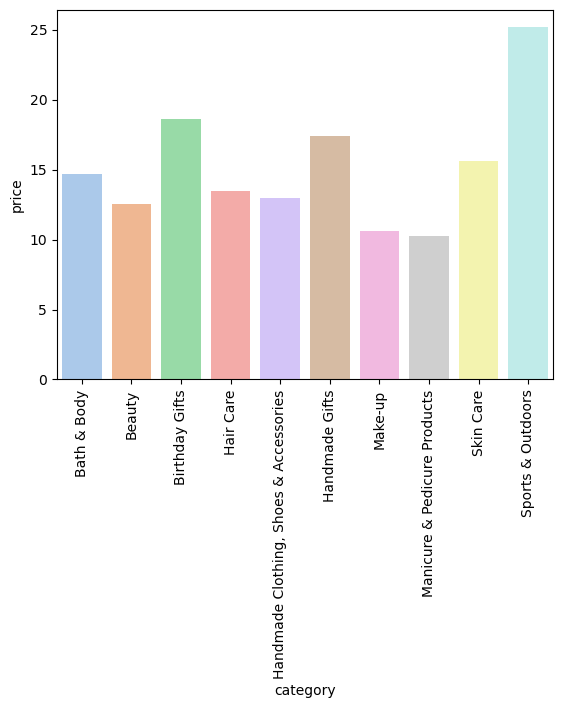

In [24]:
sns.barplot(x=df_final10["category"], y=df_final10["price"], palette="pastel")
plt.xticks(rotation=90)

In [25]:
df_clean.groupby("category").agg({"price":"mean"}).sort_values(by="price", ascending=False).round(2).head(1)

,price
category,
Motherboards,68.77


In [26]:
df_clean_final10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1422882,1565480,B0055SY77Y,Einstein's Tennis Racket (Einstein-Uber years),5.0,1,0.00,False,0,Sports & Outdoors
342871,367018,B07TYXW54L,Exercises with Resistance Loop Bands: 40+ Exer...,4.1,94,0.00,False,0,Sports & Outdoors
1531995,1726672,B07YGP8442,100 Years of Leeds United,4.8,1349,0.00,False,0,Sports & Outdoors
1025782,1134431,B0BL8LQCHZ,"4 in 1 Bundle Off the Grid Survival Book, Prep...",4.3,5,0.00,False,0,Sports & Outdoors
1532255,1727033,B082H1M3WM,Folklore and Fables II: An alternative look at...,4.7,14,0.00,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
91232,99330,B0B6RM5S41,Beeline Bike GPS Computer - Velo 2 | Wireless ...,4.1,207,99.99,False,0,Sports & Outdoors
91349,99447,B09RZL31L2,CANMORE HG200 Handheld Golf GPS & Case - Essen...,3.2,235,99.99,False,0,Sports & Outdoors
91524,99623,B09G62MCLL,TecTecTec ULT-G Ultra-Light Golf GPS Handheld ...,3.9,66,99.99,False,0,Sports & Outdoors
91557,99656,B0BNNFXH8F,TecTecTec TEAM8 S Golf GPS Bluetooth Speaker -...,4.4,70,99.99,False,0,Sports & Outdoors


/var/folders/nt/dslv10js033g889ybfhq1dmw0000gn/T/ipykernel_2595/1585020751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean_final10, x="category", y="stars", palette="pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Make-up'),
  Text(2, 0, 'Manicure & Pedicure Products'),
  Text(3, 0, 'Beauty'),
  Text(4, 0, 'Hair Care'),
  Text(5, 0, 'Bath & Body'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(8, 0, 'Birthday Gifts'),
  Text(9, 0, 'Handmade Gifts')])

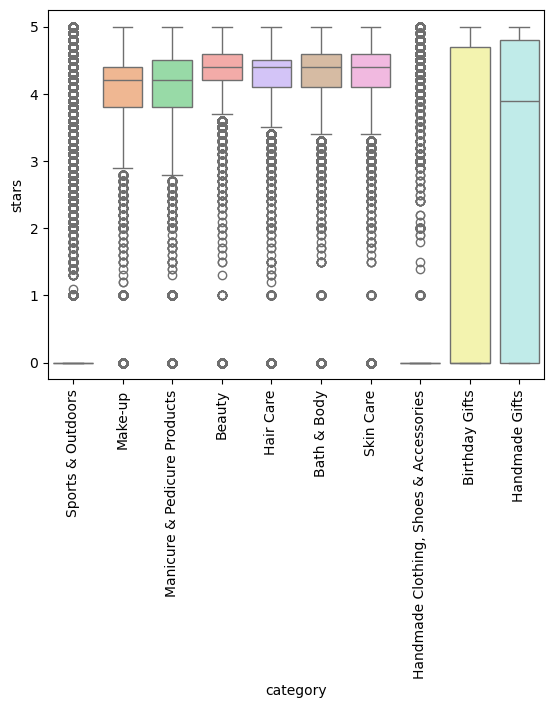

In [28]:
sns.boxplot(data=df_clean_final10, x="category", y="stars", palette="pastel")
plt.xticks(rotation=90)

In [29]:
df_clean.groupby("category").agg({"stars":"median"}).sort_values(by="stars", ascending=False).round(2).head(1)

,stars
category,
Computer Memory,4.7


Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

0 Preliminary Step: Remove outliers in product prices.
    For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

    Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

1 Violin Plots:
    Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
    Which product category tends to have the highest median price? Don't filter here by top categories.

2 Bar Charts:
    Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    Which product category commands the highest average price? Don't filter here by top categories.

3 Box Plots:
    Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [38]:
df_clean['stars'].corr(df_clean['price'])


-0.0776729987818135

### No correlation.

<Axes: xlabel='stars', ylabel='price'>

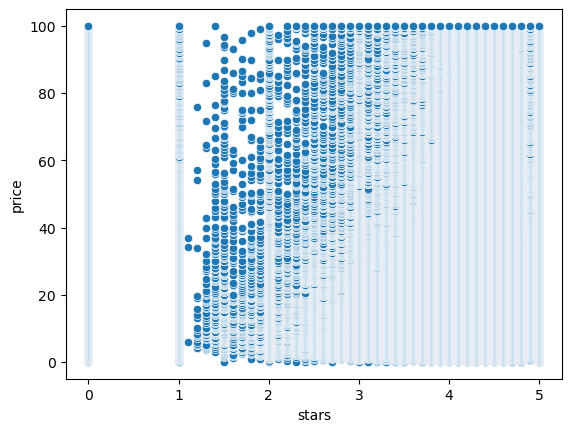

In [34]:
sns.scatterplot(df_clean, x="stars", y="price")

### The higher the stars the higher the price, but there's a lot of information on the scatterplot.

<Axes: >

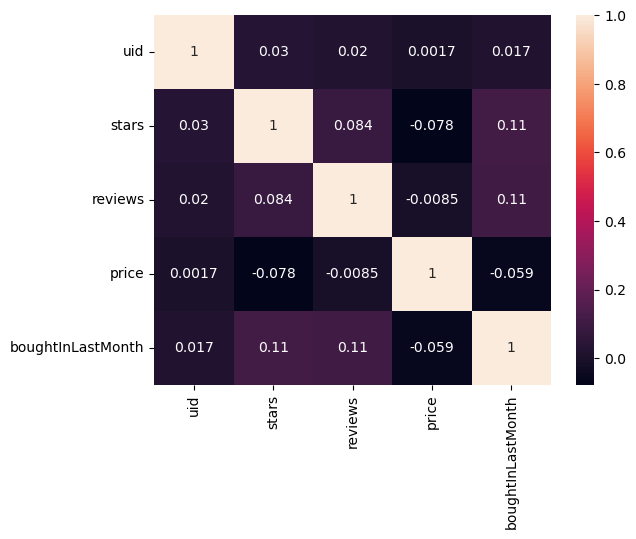

In [47]:
df_heat = df_clean.select_dtypes(include=["int","float"])
sns.heatmap(df_heat.corr(), annot=True)

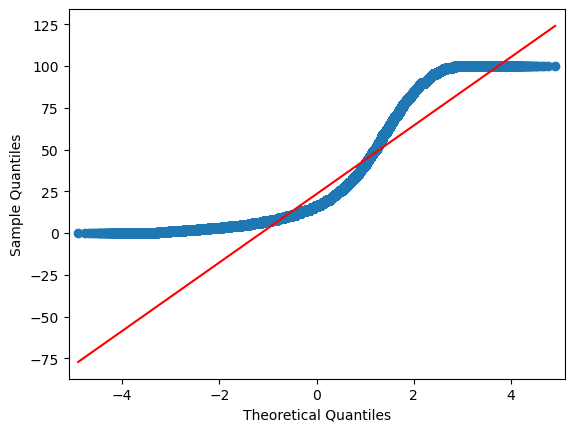

In [51]:
sm.qqplot(df_clean["price"], line='s');

Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

1 Correlation Coefficients:
    Calculate the correlation coefficient between price and stars.
    Is there a significant correlation between product price and its rating?

2 Visualizations:
    Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    Use a correlation heatmap to visualize correlations between all numerical variables.
    Examine if product prices typically follow a normal distribution using a QQ plot.